**Data Profiling**

Data profiling is the process of analyzing and understanding the characteristics and structure of a dataset. It involves examining the data to identify patterns, anomalies, and inconsistencies, as well as determining the quality and completeness of the data.

Data profiling typically involves looking at the basic statistics of the dataset, such as the number of observations, the number of missing values, the distribution of values, and the presence of outliers. 


In the code below, I have analysed the basic stats of the baseline dataset mainly column age and gender. I have also calculated the number of unique and null values in each column. And to understand the distribution better, I have used histogram. Skewness of the data is also printed.

In [1]:
import pandas as pd

# Read CSV file into a Pandas DataFrame/
df = pd.read_csv("homepap-baseline-dataset-0.1.0.csv", usecols=[4, 5])


# Get basic statistics for each column
stats = df.describe()

# Get count of null values for each column
null_count = df.isnull().sum()

# Get count of unique values for each column
unique_count = df.nunique()

print("Basic Statistics:")
print(stats)
print("\nCount of Null Values:")
print(null_count)
print("\nCount of Unique Values:")
print(unique_count)


Basic Statistics:
              age      gender
count  373.000000  373.000000
mean    46.463807    0.603217
std     11.914205    0.489887
min     20.000000    0.000000
25%     37.000000    0.000000
50%     46.000000    1.000000
75%     55.000000    1.000000
max     80.000000    1.000000

Count of Null Values:
age       0
gender    0
dtype: int64

Count of Unique Values:
age       56
gender     2
dtype: int64


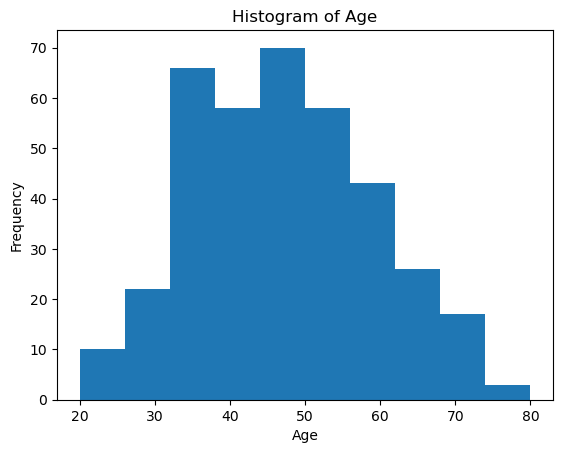

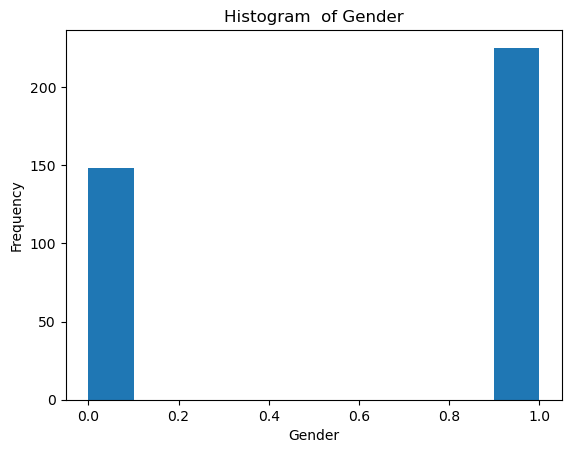


Skewness:
age       0.194559
gender   -0.423663
dtype: float64


In [2]:
import matplotlib.pyplot as plt

plt.hist(df['age'])

# add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

# display the plot
plt.show()

plt.hist(df['gender'])

# add labels and title
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Histogram  of Gender')

# display the plot
plt.show()

skewness = df.skew()
print("\nSkewness:")
print(skewness)

In the code below, I have analysed the basic stats of the month 1 dataset mainly columns Diastolic BP and Systolic BP. I have also calculated the number of unique and null values in each column. And to understand the distribution better, I have used histogram. Skewness of the data is also printed.

In [3]:
import pandas as pd

# Read CSV file into a Pandas DataFrame/
df = pd.read_csv("homepap-month1-dataset-0.1.0.csv", usecols=[8, 9])


# Get basic statistics for each column
stats = df.describe()

# Get count of null values for each column
null_count = df.isnull().sum()

# Get count of unique values for each column
unique_count = df.nunique()

print("Basic Statistics:")
print(stats)
print("\nCount of Null Values:")
print(null_count)
print("\nCount of Unique Values:")
print(unique_count)

Basic Statistics:
         systolic   diastolic
count  152.000000  152.000000
mean   128.424342   78.815789
std     17.302314   10.247546
min    100.000000   53.000000
25%    116.750000   71.750000
50%    126.000000   80.000000
75%    139.000000   85.000000
max    226.000000  111.000000

Count of Null Values:
systolic     221
diastolic    221
dtype: int64

Count of Unique Values:
systolic     57
diastolic    44
dtype: int64


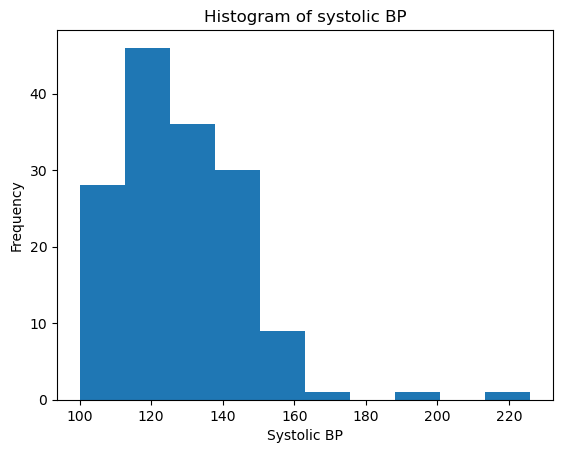

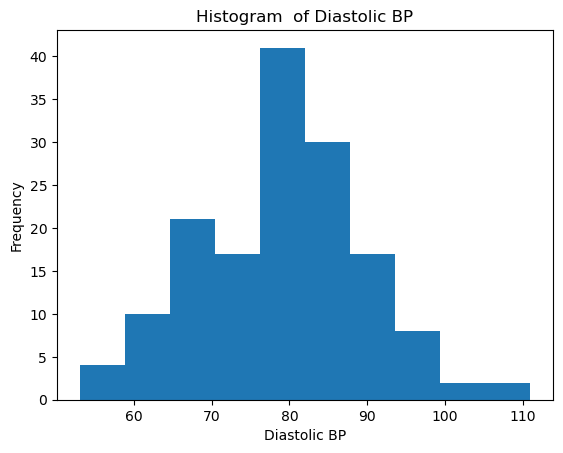


Skewness:
systolic     1.587997
diastolic    0.002319
dtype: float64


In [4]:
import matplotlib.pyplot as plt

plt.hist(df['systolic'])

# add labels and title
plt.xlabel('Systolic BP')
plt.ylabel('Frequency')
plt.title('Histogram of systolic BP')

# display the plot
plt.show()

plt.hist(df['diastolic'])

# add labels and title
plt.xlabel('Diastolic BP')
plt.ylabel('Frequency')
plt.title('Histogram  of Diastolic BP')

# display the plot
plt.show()

skewness = df.skew()
print("\nSkewness:")
print(skewness)

Data Cleansing

Data cleansing, also known as data cleaning or data scrubbing, is the process of identifying and correcting or removing errors, inconsistencies, and inaccuracies in a dataset. The goal of data cleansing is to improve the quality of the data, making it more accurate, complete, and consistent.

TODO
